<a href="https://colab.research.google.com/github/JesunAhmadUshno/Predictive-Analytics-Studies/blob/main/TIME_SERIES_FORECASTING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2015', periods=108, freq='M')
data = np.random.randn(108).cumsum()
time_series = pd.Series(data, index=date_range)

# Perform ADF test
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')


ADF Statistic: -1.2422282091620467
p-value: 0.6551716753618212
Critical Values:
   1%, -3.492995948509562
Critical Values:
   5%, -2.888954648057252
Critical Values:
   10%, -2.58139291903223


C:\Users\nader\AppData\Local\Temp\ipykernel_36064\1944157087.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1/1/2015', periods=108, freq='M')


C:\Users\nader\AppData\Local\Temp\ipykernel_36064\3674736220.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1/1/2015', periods=108, freq='M')


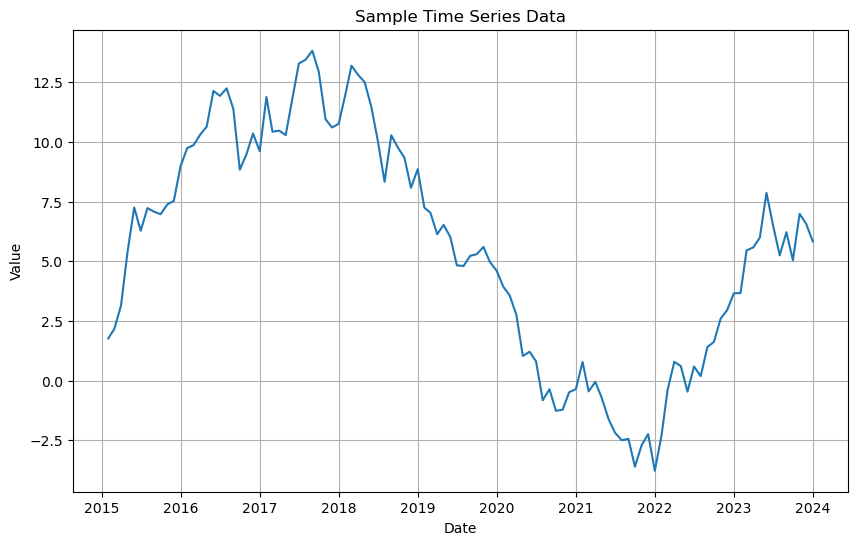

ADF Statistic: -1.2422282091620467
p-value: 0.6551716753618212
ADF Statistic after differencing: -10.048317976179058
p-value after differencing: 1.434659539032157e-17


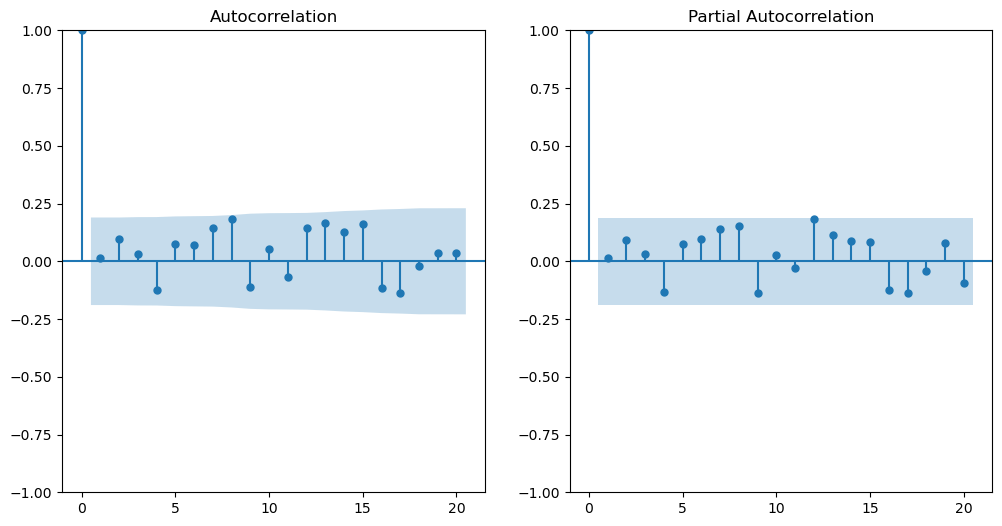

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2015', periods=108, freq='M')
data = np.random.randn(108).cumsum()
time_series = pd.Series(data, index=date_range)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Perform ADF test to check for stationarity
result = adfuller(time_series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the series is not stationary, difference the data
if result[1] > 0.05:
    time_series_diff = time_series.diff().dropna()
    result = adfuller(time_series_diff)
    print('ADF Statistic after differencing:', result[0])
    print('p-value after differencing:', result[1])

    # Plot ACF and PACF
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(time_series_diff, ax=plt.gca(), lags=20)
    plt.subplot(122)
    plot_pacf(time_series_diff, ax=plt.gca(), lags=20)
    plt.show()
else:
    # Plot ACF and PACF
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plot_acf(time_series, ax=plt.gca(), lags=20)
    plt.subplot(122)
    plot_pacf(time_series, ax=plt.gca(), lags=20)
    plt.show()


C:\Users\nader\AppData\Local\Temp\ipykernel_36064\3178099963.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='1/1/2015', periods=105, freq='M')


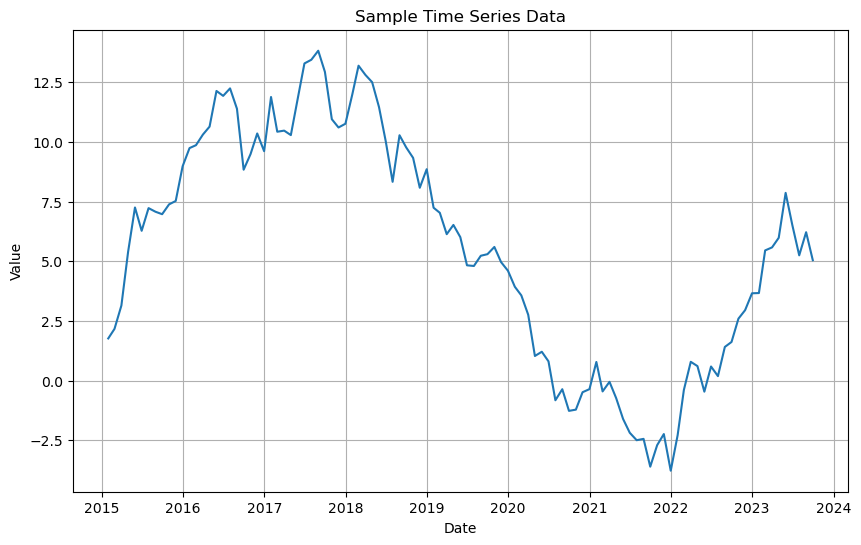

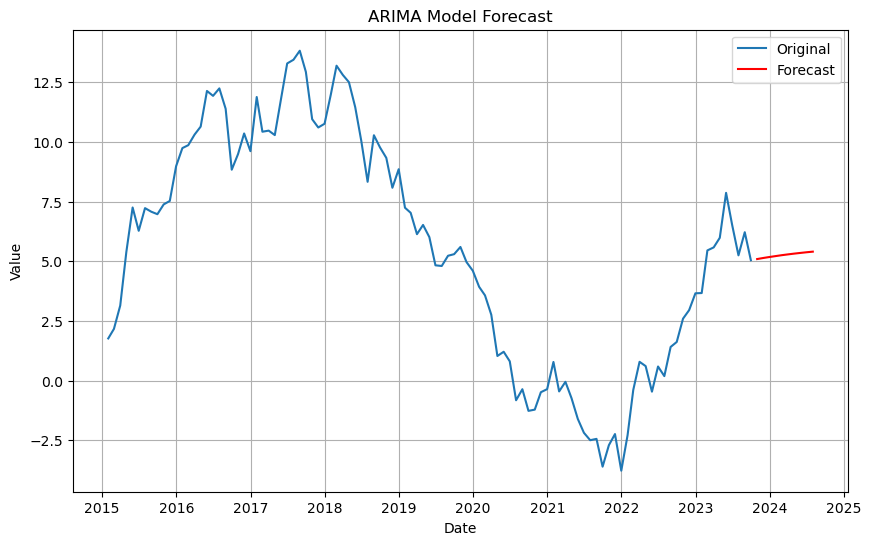

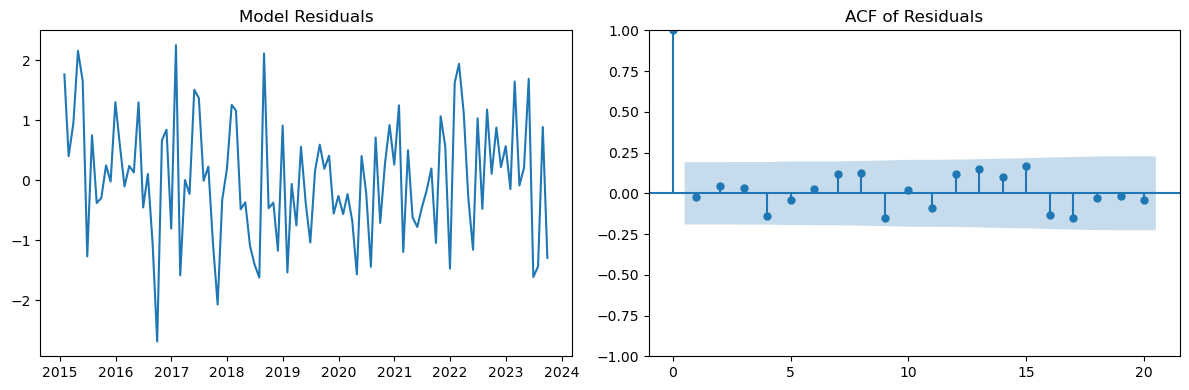

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='1/1/2015', periods=105, freq='M')
data = np.random.randn(105).cumsum()
time_series = pd.Series(data, index=date_range)

# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(time_series)
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Forecast future values
forecast = model_fit.forecast(steps=10)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()





# ------------------------------------------
residuals = model_fit.resid

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Model Residuals')

plt.subplot(1, 2, 2)
plot_acf(residuals, ax=plt.gca(), lags=20)
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()